# Multi part introductory Data Science workshop 

## Real estate appraisal using machine learning

[https://github.com/NaeuralEdgeProtocol/DS101-2024](https://github.com/NaeuralEdgeProtocol/DS101-2024)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [3]:
set_pretty_prints()

In [4]:
df = load_dataset('imobiliare.ro')

In [5]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [6]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

In [11]:
# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [12]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [13]:
y_price.mean()

134925.4898454077

Text(0.5, 1.0, 'Distribution of prices')

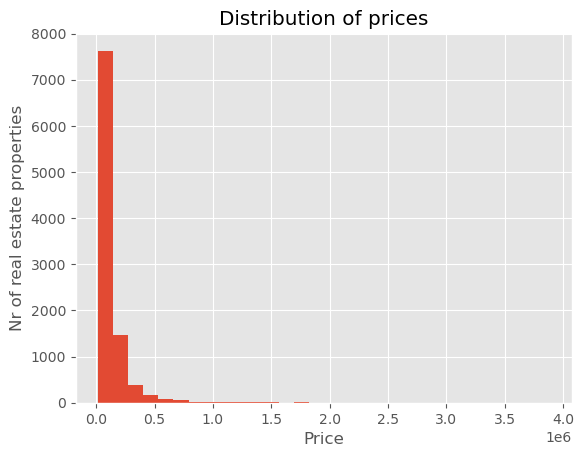

In [20]:
x_label = "Price"
y_label = "Nr of real estate properties"
title = "Distribution of prices"
y_price.hist(bins=30)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

In [14]:
def dummy_model(inputs):
  return y_price.mean() * np.ones(len(inputs))

In [21]:
def plot_feature(feat, x_label, y_label, title, bins=30):
  plt.figure()
  X[feat].hist(bins=bins)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.title(title)


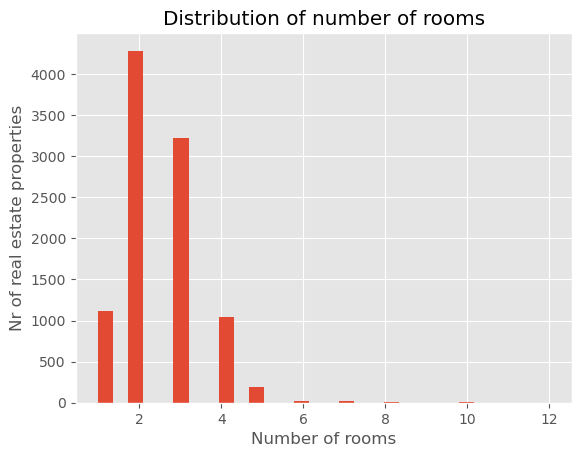

In [22]:
plot_feature("nr cam", "Number of rooms", "Nr of real estate properties", "Distribution of number of rooms")

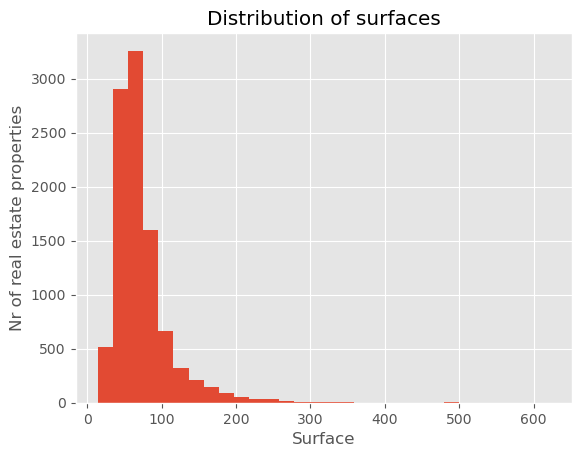

In [23]:
plot_feature("mp", "Surface", "Nr of real estate properties", "Distribution of surfaces")

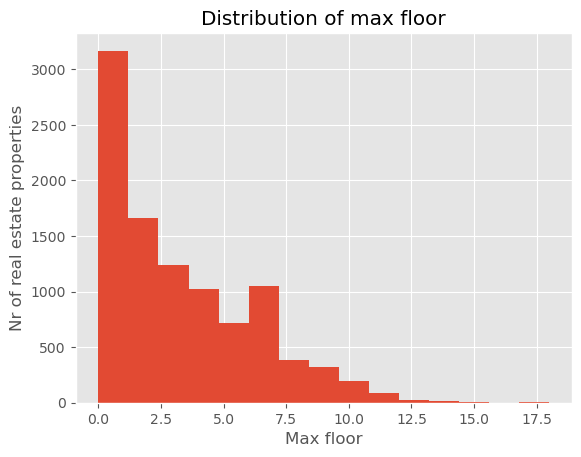

In [26]:
plot_feature("etaj max", "Max floor", "Nr of real estate properties", "Distribution of max floor", bins=15)

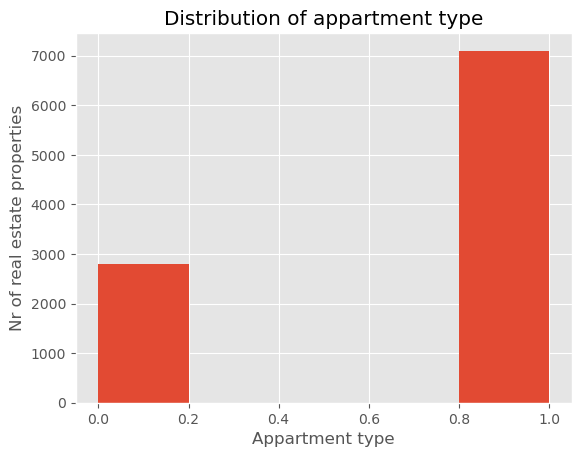

In [28]:
plot_feature("typ_decom", "Appartment type", "Nr of real estate properties", "Distribution of appartment type", bins=5)

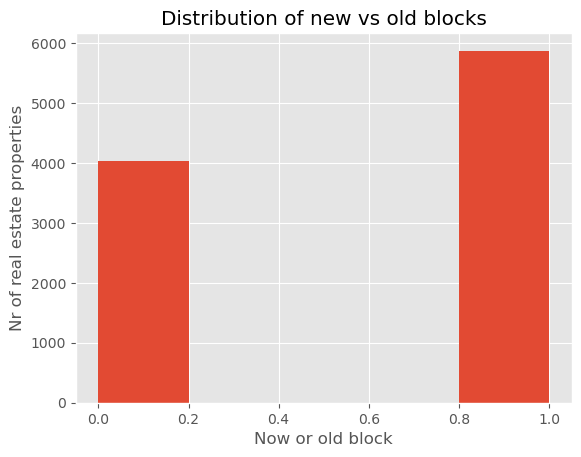

In [30]:
plot_feature("bloc nou", "Now or old block", "Nr of real estate properties", "Distribution of new vs old blocks", bins=5)

### Now lets have a look at the correlation between different features.

In [32]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [34]:
x_features = list(df.columns[START:END])
x_features

['nr cam',
 'mp',
 'parter',
 'et1-2',
 'et3+',
 'etaj max',
 'typ_decom',
 'bloc nou']

In [35]:
df[x_features + ['Price']].corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Finally the model

```
f(x) = a*x + b
f(x) = y
F(x) = w*x + w0*1 => F(x) = w'*x' where w' = [w1, w2 ..., wn, wn+1] and x = [x1, x2, ..., xn, 1]

x^-1y=1*w 

=> ((x^Tx)^(-1)x^Ty = w (in this case we need to use pseudo inverse)

=> (x^Tx + λI)^(-1)x^Ty = w (no need for pseudo inverse)
```


In [37]:
np_X = X.values
np_y = y_price.values

In [ ]:
np_w1 = # use pseudo inverse to compute the weights
np_w2 = # use lambda-identity to compute the weights

np_X_computed1 = # compute the predicted values based on np_w1 
np_X_computed2 = # compute the predicted values based on np_w2

# compute error vs np_y 